<a href="https://colab.research.google.com/github/balsrini/EIP/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
#import keras
# https://keras.io/
!pip install -q keras
import keras

In [0]:
#import numpy for array manipulations  and keras convolutions
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#load the mnist data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


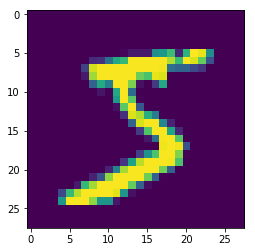

In [20]:
#print the sample image in the mnist data
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#reshape the matrix before using for training
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#dividing the matrix by 255 to normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [23]:
#expected values of the first 10 images
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [25]:
#representing the data in matrix format for comparisons
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
from keras.layers import Activation
model = Sequential()

#Old code commenting out. 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))

#startnig with low channel count of 8
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) #28 -> 26

model.add(Convolution2D(16,3,activation="relu")) #26 ->24
model.add(Convolution2D(32,3,activation="relu")) #24 -> 22


model.add(MaxPooling2D(pool_size=(2, 2))) #22 ->11
model.add(Convolution2D(10, 1, activation='relu')) #11 -> 11

model.add(Convolution2D(16,3,activation="relu")) #11 ->9
model.add(Convolution2D(32,3,activation="relu")) #9 -> 7

model.add(Convolution2D(10, 1, activation='relu')) #7 -> 7
model.add(Convolution2D(16,3,activation="relu")) #7 -> 5
model.add(Convolution2D(32,3,activation="relu")) #5 -> 3

model.add(Convolution2D(10, 1, activation='relu')) #3 -> 3
model.add(Convolution2D(10, 3)) #3 - >1



model.add(Flatten())
model.add(Activation('softmax'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if sys.path[0] == '':


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 10)        330       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 16)          1456      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 32)          4640      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [29]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.2885 - acc: 0.9070
Epoch 2/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.0942 - acc: 0.9718
Epoch 3/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.0723 - acc: 0.9784
Epoch 4/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.0614 - acc: 0.9814
Epoch 5/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.0523 - acc: 0.9842
Epoch 6/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.0449 - acc: 0.9864
Epoch 7/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.0404 - acc: 0.9875
Epoch 8/20
60000/60000 [==============================] - 14s 225us/step - loss: 0.0360 - acc: 0.9893
Epoch 9/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.0333 - acc: 0.9894
Epoch 10/20
60000/60000 [==============================] - 13s 209us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [31]:
print(score)

[0.04636224313540006, 0.987]


In [0]:
y_pred = model.predict(X_test)

In [33]:
print(y_pred[:9])
print(y_test[:9])

[[7.89549884e-11 1.62061227e-08 5.20662127e-07 8.02295381e-06
  2.14459425e-14 1.47046576e-11 6.89067597e-26 9.99991417e-01
  1.99739851e-08 1.57227689e-08]
 [5.30338129e-09 1.07305532e-07 9.99995112e-01 1.80100155e-16
  1.77284663e-12 4.63062748e-12 4.72834017e-06 2.29438474e-14
  7.71975595e-10 1.18147086e-19]
 [5.27518003e-12 9.99978781e-01 2.22932228e-09 1.71933845e-09
  5.43500050e-07 1.66643545e-07 3.36447386e-08 6.95219740e-08
  2.03500240e-05 1.87661789e-10]
 [9.99988198e-01 4.44411188e-16 5.71885074e-12 5.60179247e-12
  1.35028685e-12 5.84874513e-08 1.14890599e-05 2.77432612e-12
  1.85114175e-07 2.60977767e-10]
 [3.65653039e-18 1.26096240e-17 3.72941923e-17 4.07884794e-12
  9.99999881e-01 1.34087115e-15 2.10181766e-13 9.17008033e-15
  9.01271191e-13 1.36502749e-07]
 [3.06740987e-11 9.99995112e-01 1.64754255e-09 2.21729514e-12
  2.14606575e-06 6.92333746e-10 2.10773732e-09 1.82750853e-06
  9.11758718e-07 6.64442001e-10]
 [2.32495681e-19 1.58268406e-07 1.74149861e-11 3.29723092e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

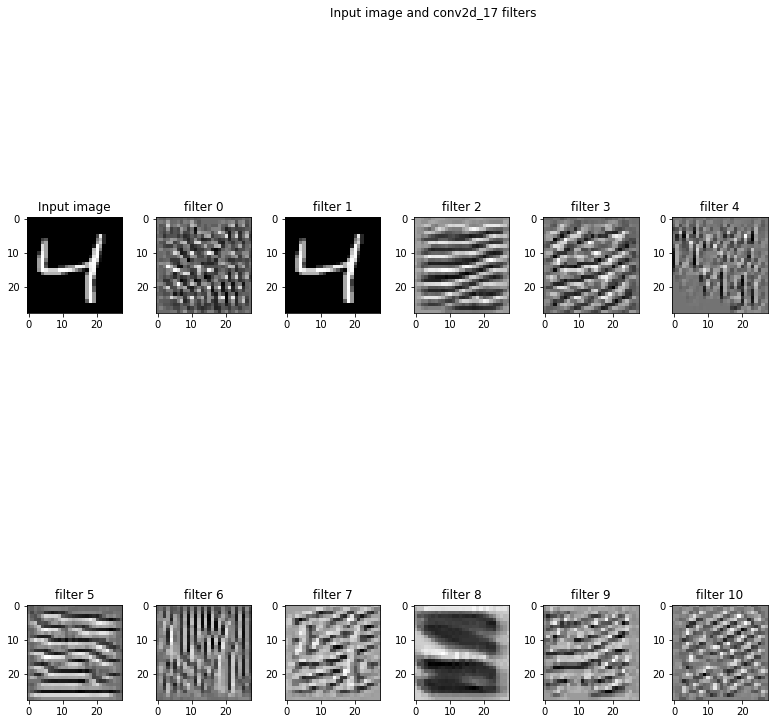

In [40]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_17'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()